<a href="https://colab.research.google.com/github/DesireeHc/EcuacionesDiferenciales/blob/main/Copia_de_Ejemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimización con scipy

In [ ]:
%matplotlib inline # Configura Matplotlib para mostrar gráficas dentro del notebook

In [ ]:
# Importamos las librerías necesarias
import numpy as np  # Para operaciones numéricas y creación de arrays
import scipy.optimize as opt  # Para optimización numérica
import matplotlib.pyplot as plt  # Para crear gráficos

## Ejemplo 1.

Consideremos el siguiente programa:

Minimizar: $\frac{1}{2}(x^2-y^2)$, sujeta a la restricción: $x + \frac{y^2}{2} = 2$

In [ ]:
def f(x):
    return (x[0]**2-x[1]**2)/2.0
#Esta función calcula el valor de una función matemática dada un vector x.
  # x: Un vector que representa los valores de las variables independientes.

(-3.0, 2.0, -3.0, 3.0)

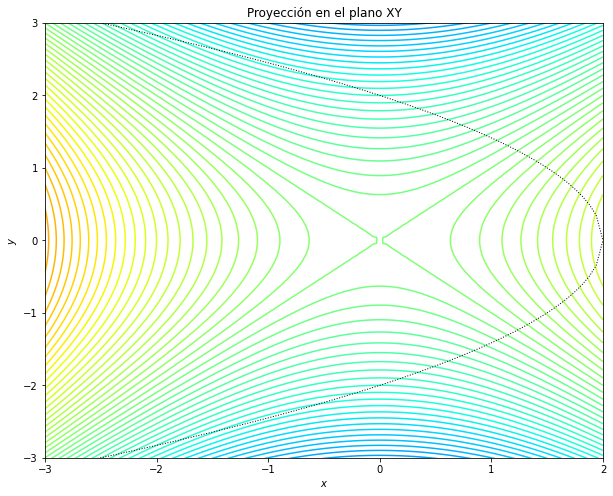

In [ ]:
# Importa numpy para realizar cálculos numéricos y matplotlib para gráficos
import numpy as np
import matplotlib.pyplot as plt

# Genera 100 puntos linealmente espaciados entre -4 y 2 para el eje x
x = np.linspace(-4, 2, 100)

# Genera 100 puntos linealmente espaciados entre -4 y 4 para el eje y
y = np.linspace(-4, 4, 100)

# Crea una cuadrícula a partir de los valores de x y y. X e Y son matrices de tamaño (100,100).
X, Y = np.meshgrid(x, y)

# Aplica la función f sobre las coordenadas X e Y.
# Apila X e Y en un arreglo de dos filas, luego aplana esas coordenadas y las pasa a la función f.
# El resultado de la función f se remodela a una matriz de 100x100 para representar los valores Z en la cuadrícula.
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

# Inicia una figura de tamaño 10x8 pulgadas para el gráfico.
plt.figure(figsize=(10,8))

# Genera un gráfico de contorno de la función Z en el espacio X, Y.
# np.arange(-10, 10, 0.2) define los niveles de contorno, y 'cmap' define el mapa de colores (jet).
plt.contour(X, Y, Z, np.arange(-10,10, 0.2), cmap='jet')

# Dibuja una curva representada por la raíz cuadrada de la expresión (4 - 2*x).
# Esto es una curva que se superpone al gráfico de contorno y es dibujada con una línea punteada negra.
plt.plot(x, np.sqrt(4-2.0*x), 'k:', linewidth=1)

# Dibuja la curva opuesta (negativa) de la raíz cuadrada anterior. También se dibuja con línea punteada negra.
plt.plot(x, -np.sqrt(4-2.0*x), 'k:', linewidth=1)

# Etiquetas para los ejes x e y, usando notación de LaTeX para dar formato a las variables.
plt.xlabel('$x$')
plt.ylabel('$y$')

# Título del gráfico, explicando que es una proyección en el plano XY.
plt.title("Proyección en el plano XY")

# Ajusta los límites del gráfico. El eje x varía entre -3 y 2, y el eje y entre -3 y 3.
plt.axis([-3.0,2.0,-3.0,3.0])

# Muestra el gráfico.
plt.show()


In [ ]:
# Define una restricción para un problema de optimización
cons = ({'type': 'eq',  # Especifica que esta es una restricción de igualdad (eq)
         'fun' : lambda x: np.array([x[0] + 0.5*x[1]**2 - 2.0])})
         # La restricción es una función lambda que toma un vector x como entrada.
         # La restricción es: x[0] + 0.5 * x[1]^2 - 2.0 = 0

# Define los límites (boundaries) de las variables en el problema de optimización.
# 'bnds' es una tupla de dos pares, donde cada par especifica los límites permitidos
# para cada una de las variables en la solución del problema de optimización.
bnds = ((-4.0, 4.0),  # La primera variable x[0] está acotada entre -4.0 y 4.0
        (-4.0, 4.0))  # La segunda variable x[1] está acotada entre -4.0 y 4.0


In [ ]:
x0 = [0, 2.5] #punto inicial

In [ ]:
# Importa el módulo 'optimize' de scipy
import scipy.optimize as opt

# Minimiza la función f, partiendo de un punto inicial x0.
# 'f' es la función objetivo que se desea minimizar.
# 'x0' es el punto inicial, que es el primer valor que se probará en la búsqueda de la solución.
# 'constraints=None' significa que no se aplican restricciones en este problema de optimización.
ux = opt.minimize(f, x0, constraints=None)

# Muestra el resultado de la optimización.
# 'ux' es un resultado, contiene información sobre la optimización realizada,
ux


      fun: -537414.9138
 hess_inv: array([[ 1.        ,  0.        ],
       [ 0.        , -0.99999788]])
      jac: array([    0.       , -1036.7421875])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 348
      nit: 1
     njev: 112
   status: 2
  success: False
        x: array([   0.  , 1036.74])

In [ ]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons) #Realiza optimización de la función f
#f= función a minimizar
#x0= punto inicial, aproximación inicial
#bounds= especifican los límites
#constraints= restricciones para cumplir la optimización
cx #almacena el resultado de la optimización

     fun: -2.5000000000010743
     jac: array([-1.00000283, -2.4494912 ])
 message: 'Optimization terminated successfully'
    nfev: 13
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([-0.99999999,  2.44948974])

Trazar los puntos críticos sobre la gráfica.

## Ejemplo 2.

Optimizar la función:
$$-(2xy+2x-x^2-2y^2)$$
sujeta a las restricciones:
$$x^3-y=0$$
$$y-(x-1)^4-2 \geq 0$$
$$0.5 \geq x \geq 1.5$$
$$1.5 \geq y \geq 2.5$$

In [ ]:
def f(x):
    return -(2*x[0]*x[1] + 2*x[0] - x[0]**2 - 2*x[1]**2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Genera 100 puntos linealmente espaciados entre 0 y 3 para el eje x
#da buena resolución al gráfico
x = np.linspace(0, 3, 100)
# Genera 100 puntos linealmente espaciados entre 0 y 3 para el eje y
#mantiene la simetria con el eje x
y = np.linspace(0, 3, 100)

# Crea una cuadrícula 2D a partir de los valores de x y y.
# X e Y son matrices de tamaño (100, 100) que representan todas las combinaciones de x e y.
X, Y = np.meshgrid(x, y)

# Aplica la función f sobre las coordenadas X e Y.
# 'np.vstack' apila X e Y en un arreglo de dos filas y 'ravel' aplana el arreglo a un vector.
# El resultado de la función f se remodela (reshape) a una matriz de 100x100 para representar los valores Z en la cuadrícula.
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

# Crea un gráfico de contorno de la función Z en el espacio X, Y.
# np.arange(-1.99, 10, 1) define los niveles de contorno y 'cmap' define el mapa de colores (jet).
plt.contour(X, Y, Z, np.arange(-1.99, 10, 1), cmap='jet')

# Dibuja una curva representada por la función cúbica x^3, con una línea punteada negra.
#para ver como se comporta en el gráfico
plt.plot(x, x**3, 'k:', linewidth=1)

# Dibuja otra curva (una función cuártica) que se superpone al gráfico de contorno, también con línea punteada negra.
#se utiliza dicha función por su forma de campana, al sumar 2, sube la función y aparece en el rango del gráfico
plt.plot(x, (x - 1)**4 + 2, 'k:', linewidth=1)

# Rellena un cuadrado definido por los puntos en las listas, con una transparencia del 30%.
plt.fill([0.5, 0.5, 1.5, 1.5], [2.5, 1.5, 1.5, 2.5], alpha=0.3)

# Ajusta los límites del gráfico para que el eje x varíe entre 0 y 3, y el eje y también entre 0 y 3.
plt.axis([0, 3, 0, 3])

# Opcional: Añadir etiquetas y título si es necesario
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.title("Gráfico de Contorno y Curvas")
plt.colorbar(label='Valor de Z')  # Añade una barra de color para indicar los valores de Z
plt.show()  # Muestra el gráfico


(0.0, 3.0, 0.0, 3.0)

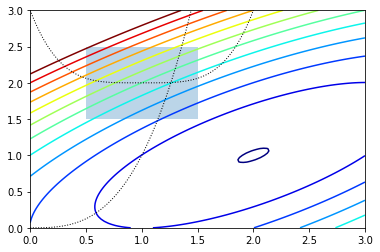

In [ ]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3])

In [ ]:
cons = ({'type': 'eq',
         'fun' : lambda x: np.array([x[0]**3 - x[1]]),
         'jac' : lambda x: np.array([3.0*(x[0]**2.0), -1.0])},
        {'type': 'ineq',
         'fun' : lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

bnds = ((0.5, 1.5), (1.5, 2.5))

In [ ]:
x0 = [0, 2.5]

No restringida

In [ ]:
ux = opt.minimize(f, x0, constraints=None)
ux

      fun: -1.9999999999996365
 hess_inv: array([[0.99829115, 0.50105608],
       [0.50105608, 0.4993548 ]])
      jac: array([ 1.25169754e-06, -1.41561031e-06])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 6
   status: 0
  success: True
        x: array([2.00000043, 0.99999985])

Con restricciones

In [ ]:
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)
cx

     fun: 2.049915472024102
     jac: array([-3.48747933,  5.49674535])
 message: 'Optimization terminated successfully'
    nfev: 19
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.26089314, 2.00463288])

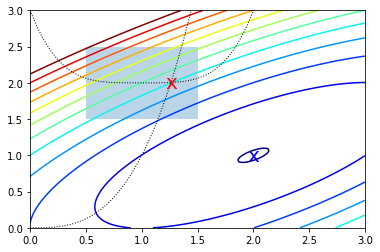

In [ ]:
x = np.linspace(0, 3, 100)
y = np.linspace(0, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))
plt.contour(X, Y, Z, np.arange(-1.99,10, 1), cmap='jet');
plt.plot(x, x**3, 'k:', linewidth=1)
plt.plot(x, (x-1)**4+2, 'k:', linewidth=1)
plt.text(ux['x'][0], ux['x'][1], 'x', va='center', ha='center', size=20, color='blue')
plt.text(cx['x'][0], cx['x'][1], 'x', va='center', ha='center', size=20, color='red')
plt.fill([0.5,0.5,1.5,1.5], [2.5,1.5,1.5,2.5], alpha=0.3)
plt.axis([0,3,0,3]);

Los ejercicios a continuación se resolvieron de la siguiente manera:

* Definir la función.

* Calcular las derivadas parciales para encontrar los puntos críticos.

* Determinar la naturaleza de esos puntos críticos (máximos, mínimos o silla).




# Actividad 1

Determinar las coordenadas de los máximos relativos, mínimos relativos y puntos silla de la función z=f(x, y)

 a) $z=4x^3+y^3-12x-3y$



Punto crítico encontrado: [1. 1.]
Valor de z en el punto crítico: -10.0
Clasificación del punto crítico: mínimo relativo


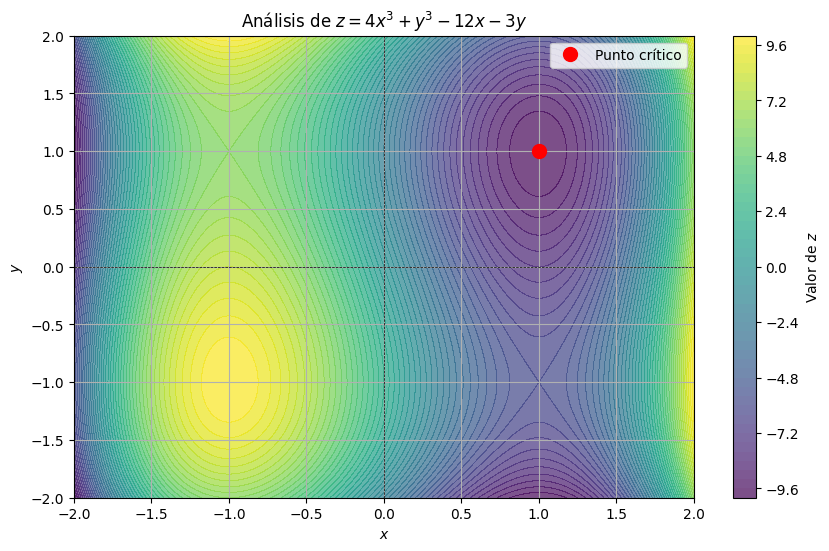

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función z
def f(x):
    return 4 * x[0]**3 + x[1]**3 - 12 * x[0] - 3 * x[1]

# Definimos las derivadas parciales
def grad_f(x):
    df_dx = 12 * x[0]**2 - 12
    df_dy = 3 * x[1]**2 - 3
    return np.array([df_dx, df_dy])

# Encontrar puntos críticos usando optimización
x0 = [1, 1]  # Punto inicial
result = opt.minimize(f, x0, jac=grad_f)

# Mostrar resultados
if result.success:
    print(f"Punto crítico encontrado: {result.x}")
    print(f"Valor de z en el punto crítico: {result.fun}")
else:
    print("No se encontró un punto crítico.")

# Función para calcular la matriz Hessiana
def hessian_f(x):
    d2f_dx2 = 24 * x[0]  # d²f/dx²
    d2f_dy2 = 6 * x[1]   # d²f/dy²
    d2f_dxdy = 0         # d²f/dxdy = 0
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dxdy, d2f_dy2]])

# Clasificación del punto crítico
hessian_at_critical_point = hessian_f(result.x)
det_H = np.linalg.det(hessian_at_critical_point)

if det_H > 0:
    if hessian_at_critical_point[0, 0] > 0:
        classification = 'mínimo relativo'
    else:
        classification = 'máximo relativo'
else:
    classification = 'punto silla'

print(f"Clasificación del punto crítico: {classification}")

# Graficar la función
x_vals = np.linspace(-2, 2, 400)
y_vals = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 4 * X**3 + Y**3 - 12 * X - 3 * Y

plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Valor de $z$')
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.title("Análisis de $z = 4x^3 + y^3 - 12x - 3y$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid()
plt.legend()
plt.show()


Resultado de la optimización:
Valor óptimo de x: 1.0000000180715438
Valor óptimo de y: 1.0000001184713405
Valor mínimo de z: -9.999999999999954


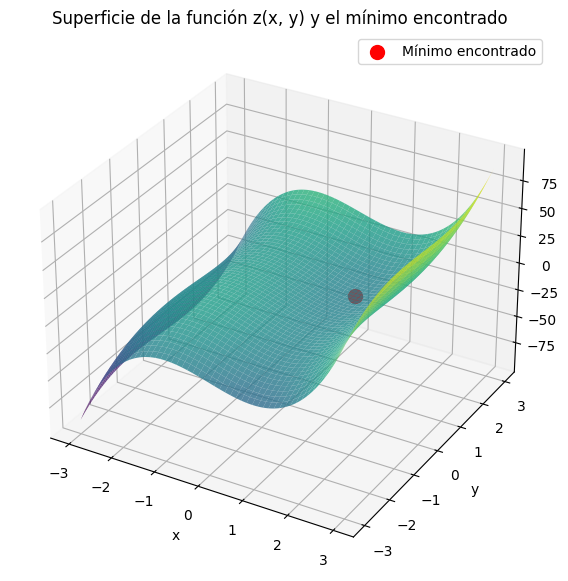

In [ ]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Definir la función objetivo z(x, y)
def z(x):
    # x[0] es 'x' y x[1] es 'y'
    return 4*x[0]**3 + x[1]**3 - 12*x[0] - 3*x[1]

# Definir el punto inicial para la optimización
x0 = np.array([0.0, 0.0])  # Suposición inicial para x y y

# Llamar a minimize para encontrar los valores de x y y que minimizan la función z
result = minimize(z, x0)

# Mostrar el resultado
print("Resultado de la optimización:")
print(f"Valor óptimo de x: {result.x[0]}")
print(f"Valor óptimo de y: {result.x[1]}")
print(f"Valor mínimo de z: {result.fun}")

# Crear una cuadrícula de puntos para graficar la función
x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x_vals, y_vals)

# Calcular los valores de z en toda la cuadrícula
Z = 4*X**3 + Y**3 - 12*X - 3*Y

# Crear la figura y el gráfico 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie de la función z(x, y)
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Resaltar el punto del mínimo encontrado por el algoritmo
ax.scatter(result.x[0], result.x[1], result.fun, color='r', s=100, label="Mínimo encontrado")

# Etiquetas de los ejes
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Título
ax.set_title('Superficie de la función z(x, y) y el mínimo encontrado')

# Mostrar leyenda
ax.legend()

# Mostrar la gráfica
plt.show()


 b) $ z=2x^2 +3xy+y^2-2x-y+1$

In [ ]:
import numpy as np
import scipy.optimize as opt

# Definimos la función
def z(x):
    return 2*x[0]**2 + 3*x[0]*x[1] + x[1]**2 - 2*x[0] - x[1] + 1

# Calculamos las derivadas parciales
def grad_z(x):
    dz_dx = 4*x[0] + 3*x[1] - 2
    dz_dy = 3*x[0] + 2*x[1] - 1
    return np.array([dz_dx, dz_dy])

# Encontrar puntos críticos resolviendo gradiente = 0
x0 = np.array([0, 0])  # Punto inicial
critical_point = opt.fsolve(grad_z, x0)

# Mostrar el punto crítico encontrado
print(f"Punto crítico encontrado: {critical_point}")

# Evaluar la matriz Hessiana en el punto crítico
def hessian_z(x):
    d2z_dx2 = 4
    d2z_dxdy = 3
    d2z_dydx = 3
    d2z_dy2 = 2
    return np.array([[d2z_dx2, d2z_dxdy], [d2z_dydx, d2z_dy2]])

# Evaluamos la Hessiana en el punto crítico
H = hessian_z(critical_point)

# Calcular los eigenvalores de la Hessiana
eigenvalues = np.linalg.eigvals(H)

# Determinamos la naturaleza del punto crítico
if np.all(eigenvalues > 0):
    nature = "mínimo relativo"
elif np.all(eigenvalues < 0):
    nature = "máximo relativo"
else:
    nature = "punto silla"

print(f"La naturaleza del punto crítico es: {nature}")
print(f"Eigenvalores de la Hessiana: {eigenvalues}")


Punto crítico encontrado: [-1.  2.]
La naturaleza del punto crítico es: punto silla
Eigenvalores de la Hessiana: [ 6.16227766 -0.16227766]


c) $z=x^3+y^3-3axy$

Punto crítico sin restricciones: [1. 1.]
Punto crítico con restricciones: [1. 1.]


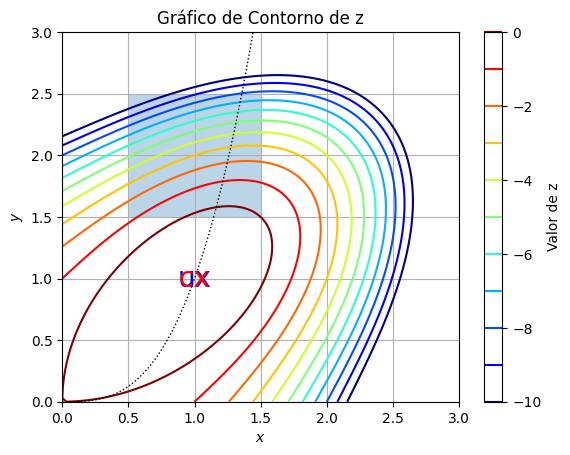

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función z
def f(x):
    return -(x[0]**3 + x[1]**3 - 3*a*x[0]*x[1])

# Valor de a (puedes modificarlo según tus necesidades)
a = 1

# Genera 100 puntos linealmente espaciados entre 0 y 3 para el eje x
x = np.linspace(0, 3, 100)
# Genera 100 puntos linealmente espaciados entre 0 y 3 para el eje y
y = np.linspace(0, 3, 100)

# Crea una cuadrícula a partir de los valores de x y y.
X, Y = np.meshgrid(x, y)

# Aplica la función f sobre las coordenadas X e Y.
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

# Genera un gráfico de contorno de la función Z en el espacio X, Y.
plt.contour(X, Y, Z, np.arange(-10, 1, 1), cmap='jet')

# Restricciones
cons = ({'type': 'eq',
         'fun': lambda x: np.array([x[0]**3 + x[1]**3 - 3*a*x[0]*x[1]]),
         'jac': lambda x: np.array([3*x[0]**2 - 3*a*x[1], 3*x[1]**2 - 3*a*x[0]])},
        {'type': 'ineq',
         'fun': lambda x: np.array([x[1] - (x[0]-1)**4 - 2])})

# Límites para la búsqueda de soluciones
bnds = ((0, 3), (0, 3))
# Punto inicial
x0 = [1, 1]

# Optimización
ux = opt.minimize(f, x0, constraints=None)
cx = opt.minimize(f, x0, bounds=bnds, constraints=cons)

# Mostrar resultados
print(f"Punto crítico sin restricciones: {ux.x}")
print(f"Punto crítico con restricciones: {cx.x}")

# Graficar los resultados
plt.plot(x, x**3, 'k:', linewidth=1)  # Curva de referencia
plt.text(ux.x[0], ux.x[1], 'ux', va='center', ha='center', size=20, color='blue')
plt.text(cx.x[0], cx.x[1], 'cx', va='center', ha='center', size=20, color='red')

# Ajustes finales al gráfico
plt.axis([0, 3, 0, 3])
plt.title("Gráfico de Contorno de z")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.colorbar(label='Valor de z')
plt.fill([0.5, 0.5, 1.5, 1.5], [2.5, 1.5, 1.5, 2.5], alpha=0.3)
plt.show()


d) $z=4xy+\frac{1}{x} + \frac{1}{y}$

Punto crítico encontrado: [0.62996047 0.62996046]
Valor mínimo de z: 4.762203155904645


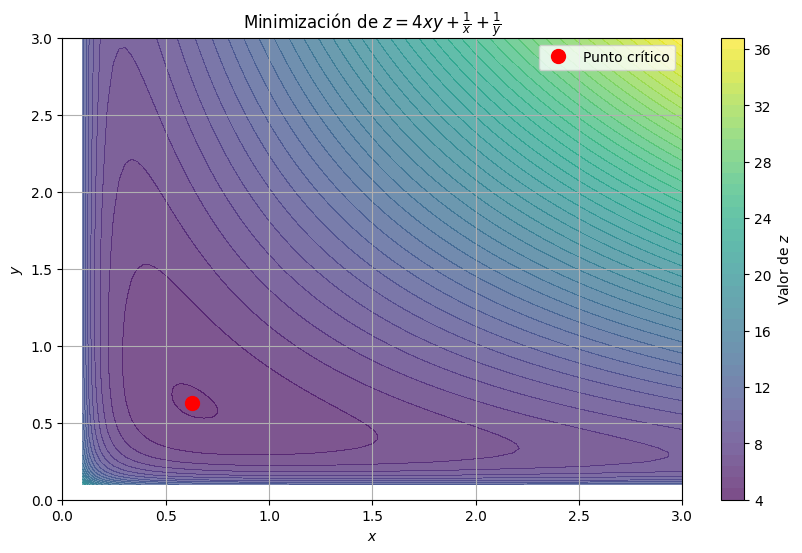

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función z a minimizar
def z(x):
    return 4 * x[0] * x[1] + (1/x[0]) + (1/x[1])

# Definimos las restricciones para evitar valores no válidos
bnds = ((0.01, None), (0.01, None))  # x, y > 0 para evitar división por cero

# Punto inicial
x0 = [1, 1]

# Optimización
result = opt.minimize(z, x0, bounds=bnds)

# Mostrar resultados
if result.success:
    print(f"Punto crítico encontrado: {result.x}")
    print(f"Valor mínimo de z: {result.fun}")
else:
    print("No se encontró un punto crítico.")

# Para graficar la función z en un rango
x_vals = np.linspace(0.1, 3, 100)
y_vals = np.linspace(0.1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = 4 * X * Y + (1/X) + (1/Y)

# Graficar la superficie de z
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Valor de $z$')
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.title("Minimización de $z = 4xy + \\frac{1}{x} + \\frac{1}{y}$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


e) $z=1-\sqrt{x^2+y^2}$

Punto crítico sin restricciones: [-6.73141484e-09 -6.73141485e-09]


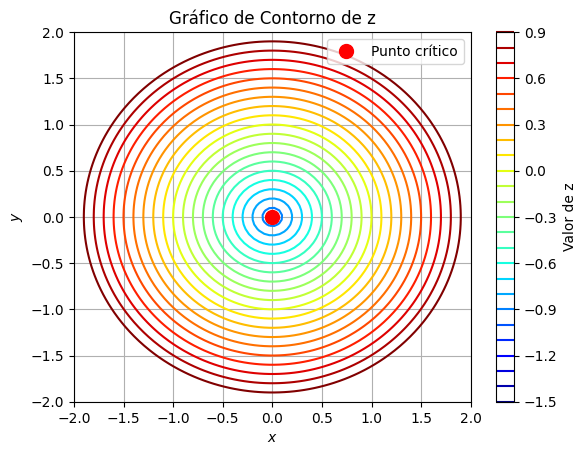

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función z
def f(x):
    return -(1 - np.sqrt(x[0]**2 + x[1]**2))

# Genera 100 puntos linealmente espaciados entre 0 y 3 para el eje x
x = np.linspace(-2, 3, 100)
# Genera 100 puntos linealmente espaciados entre 0 y 3 para el eje y
y = np.linspace(-2, 3, 100)

# Crea una cuadrícula a partir de los valores de x y y.
X, Y = np.meshgrid(x, y)

# Aplica la función f sobre las coordenadas X e Y.
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

# Genera un gráfico de contorno de la función Z en el espacio X, Y.
plt.contour(X, Y, Z, levels=np.arange(-1.5, 1, 0.1), cmap='jet')

# Límites para la búsqueda de soluciones
bnds = ((-2, 3), (-2, 3))
# Punto inicial
x0 = [1, 1]

# Optimización sin restricciones
ux = opt.minimize(f, x0, constraints=None)

# Mostrar resultados
print(f"Punto crítico sin restricciones: {ux.x}")

# Graficar los resultados
plt.plot(ux.x[0], ux.x[1], 'ro', markersize=10, label='Punto crítico')
plt.legend()

# Ajustes finales al gráfico
plt.axis([-2, 2, -2, 2])
plt.title("Gráfico de Contorno de z")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.colorbar(label='Valor de z')
plt.show()


f) $z=sin(x) sin(y) sin(x+y)$ en $0 \leq x \leq \pi$ $0 \leq y \leq \pi$

Punto crítico encontrado: [1.04719755 1.04719755]


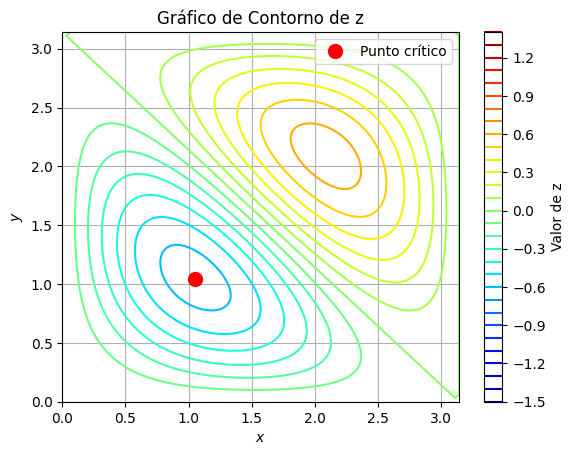

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función z
def f(x):
    return -np.sin(x[0]) * np.sin(x[1]) * np.sin(x[0] + x[1])

# Genera 100 puntos linealmente espaciados entre 0 y π para el eje x
x = np.linspace(0, np.pi, 100)
# Genera 100 puntos linealmente espaciados entre 0 y π para el eje y
y = np.linspace(0, np.pi, 100)

# Crea una cuadrícula a partir de los valores de x y y.
X, Y = np.meshgrid(x, y)

# Aplica la función f sobre las coordenadas X e Y.
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

# Genera un gráfico de contorno de la función Z en el espacio X, Y.
plt.contour(X, Y, Z, levels=np.arange(-1.5, 1.5, 0.1), cmap='jet')

# Límites para la búsqueda de soluciones
bnds = ((0, np.pi), (0, np.pi))
# Punto inicial
x0 = [np.pi/2, np.pi/2]

# Optimización
result = opt.minimize(f, x0, bounds=bnds)

# Mostrar resultados
print(f"Punto crítico encontrado: {result.x}")

# Graficar el punto crítico
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.legend()

# Ajustes finales al gráfico
plt.axis([0, np.pi, 0, np.pi])
plt.title("Gráfico de Contorno de z")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.colorbar(label='Valor de z')
plt.show()


g) $z=(x-1)^2-2y^2$

Punto crítico encontrado: [1. 0.]


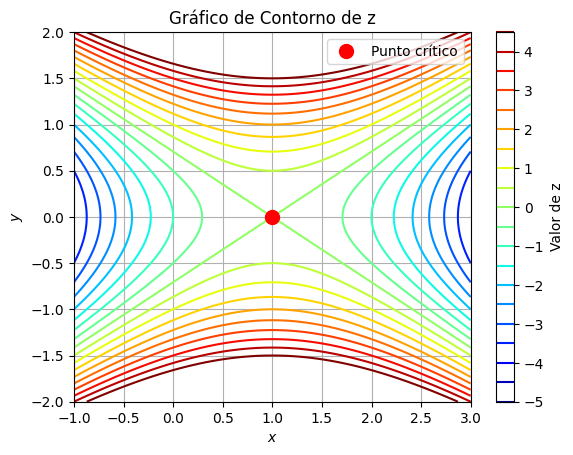

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función z
def f(x):
    return -((x[0] - 1)**2 - 2 * x[1]**2)

# Genera 100 puntos linealmente espaciados para el eje x
x = np.linspace(-1, 3, 100)
# Genera 100 puntos linealmente espaciados para el eje y
y = np.linspace(-2, 2, 100)

# Crea una cuadrícula a partir de los valores de x y y.
X, Y = np.meshgrid(x, y)

# Aplica la función f sobre las coordenadas X e Y.
Z = f(np.vstack([X.ravel(), Y.ravel()])).reshape((100, 100))

# Genera un gráfico de contorno de la función Z en el espacio X, Y.
plt.contour(X, Y, Z, levels=np.arange(-5, 5, 0.5), cmap='jet')

# Límites para la búsqueda de soluciones
bnds = ((-1, 3), (-2, 2))
# Punto inicial
x0 = [1, 0]

# Optimización
result = opt.minimize(f, x0, bounds=bnds)

# Mostrar resultados
print(f"Punto crítico encontrado: {result.x}")

# Graficar el punto crítico
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.legend()

# Ajustes finales al gráfico
plt.axis([-1, 3, -2, 2])
plt.title("Gráfico de Contorno de z")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid()
plt.colorbar(label='Valor de z')
plt.show()


# Actividad 3



a) Minimizar $f(x,y)=3x+y+10$ sujeta a $x^2y=6$

Punto crítico encontrado: [1.58740106 2.38110157]
Valor mínimo de la función: 17.143304733856315


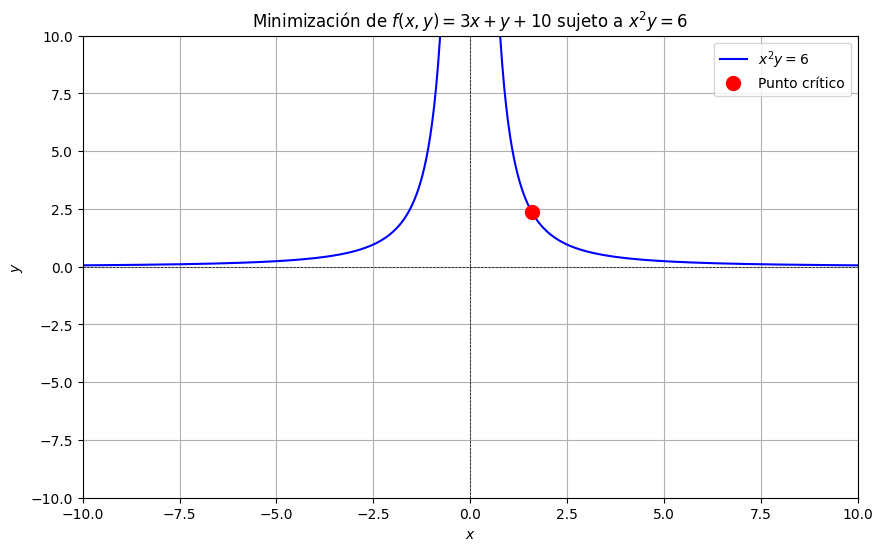

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función f a minimizar
def f(x):
    return 3 * x[0] + x[1] + 10

# Definimos la restricción x^2 * y - 6 = 0
def constraint(x):
    return x[0]**2 * x[1] - 6

# Definimos las restricciones en formato de diccionario
con = {'type': 'eq', 'fun': constraint}

# Límites para la búsqueda de soluciones
bnds = ((-10, 10), (-10, 10))  # Ajusta según lo que necesites

# Punto inicial
x0 = [1, 1]

# Optimización
result = opt.minimize(f, x0, bounds=bnds, constraints=con)

# Mostrar resultados
print(f"Punto crítico encontrado: {result.x}")
print(f"Valor mínimo de la función: {result.fun}")

# Para graficar la función y la restricción
x_vals = np.linspace(-10, 10, 400)
y_vals = 6 / (x_vals**2 + 1e-10)  # Para evitar división por cero

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$x^2 y = 6$', color='blue')
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.title("Minimización de $f(x,y) = 3x + y + 10$ sujeto a $x^2y=6$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


b) *Maximizar* $f(x, y)=\sqrt{6-x^2-y^2}$ sujeta a $x+y-2=0$

Punto crítico encontrado: [1. 1.]
Valor máximo de la función: 2.0


<ipython-input-2-b38543c521fa>:36: RuntimeWarning: invalid value encountered in sqrt
  Z = np.sqrt(6 - X**2 - Y**2)


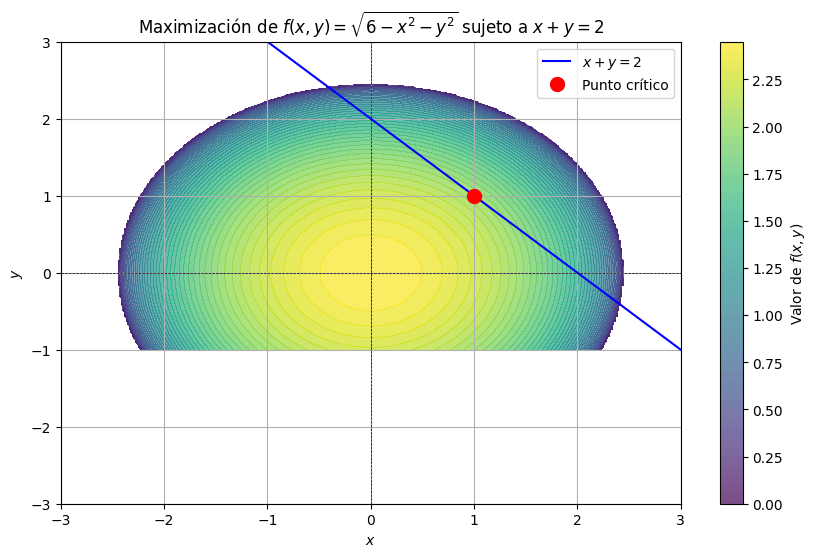

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función f a maximizar (negamos para usar minimize)
def f(x):
    return -np.sqrt(6 - x[0]**2 - x[1]**2)

# Definimos la restricción x + y - 2 = 0
def constraint(x):
    return x[0] + x[1] - 2

# Definimos las restricciones en formato de diccionario
con = {'type': 'eq', 'fun': constraint}

# Límites para la búsqueda de soluciones
bnds = ((-np.sqrt(6), np.sqrt(6)), (-np.sqrt(6), np.sqrt(6)))  # Ajustar según sea necesario

# Punto inicial
x0 = [1, 1]

# Optimización
result = opt.minimize(f, x0, bounds=bnds, constraints=con)

# Mostrar resultados
max_value = -result.fun  # Invertir para obtener el valor máximo
print(f"Punto crítico encontrado: {result.x}")
print(f"Valor máximo de la función: {max_value}")

# Para graficar la función y la restricción
x_vals = np.linspace(-3, 3, 400)
y_vals = 2 - x_vals  # De la restricción x + y = 2

# Crear una cuadrícula para la función
X, Y = np.meshgrid(x_vals, y_vals)
Z = np.sqrt(6 - X**2 - Y**2)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='Valor de $f(x, y)$')
plt.plot(x_vals, y_vals, label=r'$x + y = 2$', color='blue')
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.title("Maximización de $f(x,y) = \sqrt{6 - x^2 - y^2}$ sujeto a $x + y = 2$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


c) Maximizar $f(x, y)=e^{xy}$ sujeta a $x^2+y^2=8$

Punto crítico encontrado: [2. 2.]
Valor máximo de la función: 54.598150033144236


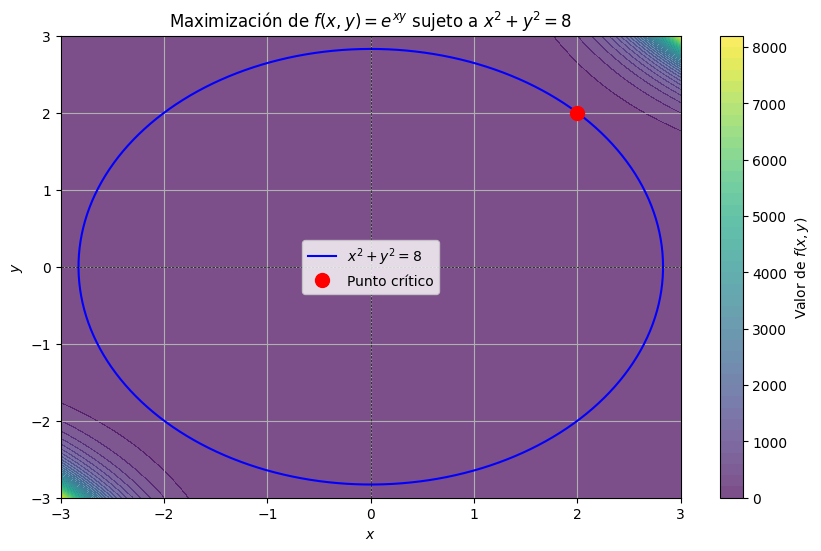

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función f a maximizar (negamos para usar minimize)
def f(x):
    return -np.exp(x[0] * x[1])

# Definimos la restricción x^2 + y^2 - 8 = 0
def constraint(x):
    return x[0]**2 + x[1]**2 - 8

# Definimos las restricciones en formato de diccionario
con = {'type': 'eq', 'fun': constraint}

# Límites para la búsqueda de soluciones
bnds = ((-np.sqrt(8), np.sqrt(8)), (-np.sqrt(8), np.sqrt(8)))  # Ajustar según sea necesario

# Punto inicial
x0 = [2, 2]

# Optimización
result = opt.minimize(f, x0, bounds=bnds, constraints=con)

# Mostrar resultados
max_value = -result.fun  # Invertir para obtener el valor máximo
print(f"Punto crítico encontrado: {result.x}")
print(f"Valor máximo de la función: {max_value}")

# Para graficar la función y la restricción
theta = np.linspace(0, 2 * np.pi, 400)
x_circle = np.sqrt(8) * np.cos(theta)
y_circle = np.sqrt(8) * np.sin(theta)

# Crear una cuadrícula para la función
X, Y = np.meshgrid(np.linspace(-3, 3, 400), np.linspace(-3, 3, 400))
Z = np.exp(X * Y)

# Graficar la función
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, Z, levels=50, cmap='viridis', alpha=0.7)
plt.colorbar(label='Valor de $f(x, y)$')
plt.plot(x_circle, y_circle, label=r'$x^2 + y^2 = 8$', color='blue')
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.title("Maximización de $f(x,y) = e^{xy}$ sujeto a $x^2 + y^2 = 8$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


d) Minimizar $f(x, y)=2x+y$ sujeta a $xy=32$

Punto crítico encontrado: [3.99999994 8.00000012]
Valor mínimo de la función: 15.999999999980588


<ipython-input-4-619e1a28e89c>:31: RuntimeWarning: divide by zero encountered in divide
  y_vals = 32 / x_vals  # De la restricción xy = 32


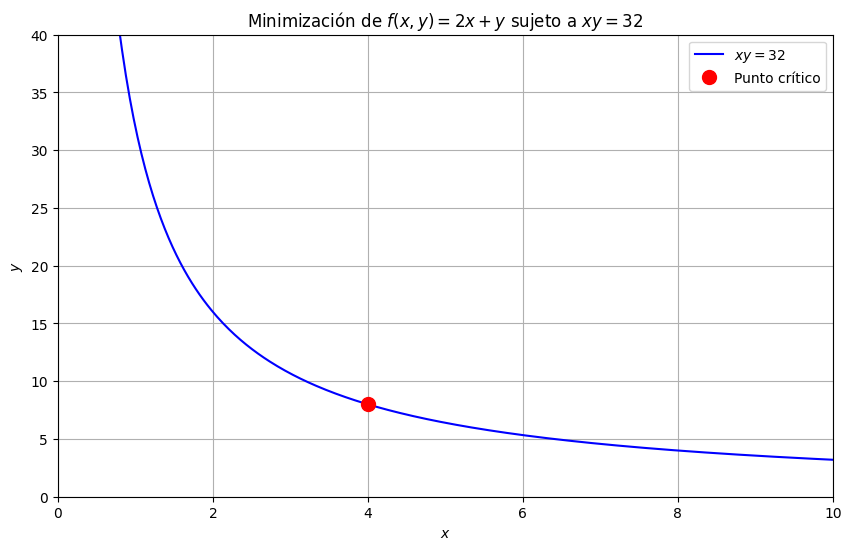

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función f a minimizar
def f(x):
    return 2 * x[0] + x[1]

# Definimos la restricción xy - 32 = 0
def constraint(x):
    return x[0] * x[1] - 32

# Definimos las restricciones en formato de diccionario
con = {'type': 'eq', 'fun': constraint}

# Límites para la búsqueda de soluciones
bnds = ((0, None), (0, None))  # Solo consideramos x, y > 0

# Punto inicial
x0 = [1, 32]  # Un punto inicial razonable

# Optimización
result = opt.minimize(f, x0, bounds=bnds, constraints=con)

# Mostrar resultados
print(f"Punto crítico encontrado: {result.x}")
print(f"Valor mínimo de la función: {result.fun}")

# Para graficar la función y la restricción
x_vals = np.linspace(0, 10, 400)
y_vals = 32 / x_vals  # De la restricción xy = 32

# Graficar la función
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r'$xy = 32$', color='blue')
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.title("Minimización de $f(x, y) = 2x + y$ sujeto a $xy = 32$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(0, 10)
plt.ylim(0, 40)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()


e) hallar puntos extremos de $z=\frac{1}{x}+\frac{1}{y}$ sujeta a $\frac{1}{x^2}+\frac{1}{y^2}=1$ con $x\neq 0$  y $y \neq 0$  

Punto crítico encontrado: [1.41421356 1.41421356]
Valor mínimo de z: 1.4142135623735532


<ipython-input-8-37bc3fce3e78>:34: RuntimeWarning: invalid value encountered in sqrt
  y_vals = 1 / np.sqrt(1 - (1 / x_vals**2))  # Resolviendo para y en términos de x
<ipython-input-8-37bc3fce3e78>:37: RuntimeWarning: invalid value encountered in sqrt
  y_vals2 = np.sqrt(8 * (1 - (1/x_vals**2)))  # Resolviendo para la restricción


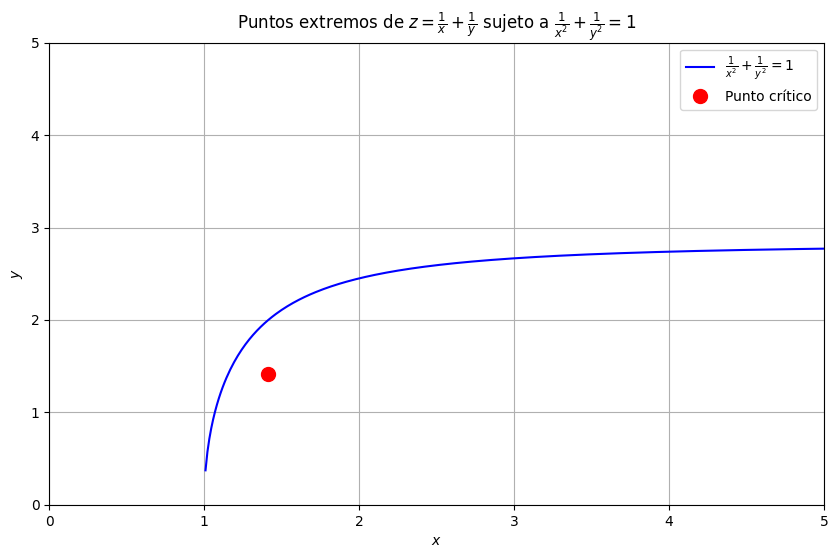

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

# Definimos la función z a minimizar
def z(x):
    return (1/x[0]) + (1/x[1])

# Definimos la restricción
def constraint(x):
    return (1/x[0]**2) + (1/x[1]**2) - 1

# Definimos las restricciones en formato de diccionario
con = {'type': 'eq', 'fun': constraint}

# Límites para la búsqueda de soluciones
bnds = ((0.01, None), (0.01, None))  # Solo consideramos x, y > 0 para evitar división por cero

# Punto inicial
x0 = [1, 1]

# Optimización
result = opt.minimize(z, x0, bounds=bnds, constraints=con)

# Mostrar resultados
if result.success:
    print(f"Punto crítico encontrado: {result.x}")
    print(f"Valor mínimo de z: {result.fun}")
else:
    print("No se encontró un punto crítico.")

# Para graficar la restricción
x_vals = np.linspace(0.1, 5, 400)
y_vals = 1 / np.sqrt(1 - (1 / x_vals**2))  # Resolviendo para y en términos de x

# Corrigiendo el cálculo de y para evitar valores inválidos
y_vals2 = np.sqrt(8 * (1 - (1/x_vals**2)))  # Resolviendo para la restricción

# Graficar la restricción
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals2, label=r'$\frac{1}{x^2} + \frac{1}{y^2} = 1$', color='blue')
plt.plot(result.x[0], result.x[1], 'ro', markersize=10, label='Punto crítico')
plt.title("Puntos extremos de $z = \\frac{1}{x} + \\frac{1}{y}$ sujeto a $\\frac{1}{x^2} + \\frac{1}{y^2} = 1$")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.axhline(0, color='black', lw=0.5, ls='--')
plt.axvline(0, color='black', lw=0.5, ls='--')
plt.grid()
plt.legend()
plt.show()
